# Case Study Project - Office Supplies
![rachael-gorjestani-X6CZGpJBi8U-unsplash.jpg](image/rachael-gorjestani-X6CZGpJBi8U-unsplash.jpg)
## Company Background
Pens & Printers is a national office supplies chain. At the moment, they send office supplies
out of warehouses in four regions: East, West, South, and Central, and all four warehouses
stock the same products.  
The Head of Sales thinks this leads to large amounts of unsold products in some locations.
## Customer Question
The management would like you to answer the following:  
● Are there products that do not sell as well in some locations?  
● Are there any other patterns over time in each region that you can find in the data  
## Dataset
|Column name |Details|
| --- | --- |
|Order ID |Character. Unique identifier for the individual order.|
|Order Date |Character. Date of the order, in format YYYY-MM-DD.|
|Ship Mode |Character. The method used to send out the order.|
|Region |Character. The region the order was sent from.|
|Product ID| Character. Unique identifier of the product ordered.|
|Category| Character. Category of the product, one of ‘Office Supplies’,‘Furniture’, or ‘Technology’.|
|Sub-Category |Character. Subcategory of the product (e.g. Binders, Paper, etc.)|
|Product Name| Character. The name of the product.|
|Sales| Numeric. Total value of the products sold in the order.|
|Quantity| Numeric. Quantity of the products in the order.|
|Discount |Numeric. Discount of the order in decimal form. (e.g. 0.30 indicates the order has a 30% discount, etc.)|
|Profit| Numeric. Profit of the order.|

## Getting the data

In [219]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Set the style to use for remaining plots
sns.set_style("dark")

# Read in the data
df_raw = pd.read_csv("data/office_supplies.csv", parse_dates=['Order Date'])

## Inspecting the data

In [220]:
df_raw.shape

(9993, 12)

In [221]:
df_raw.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,8000.000000
mean,229.854588,3.789553,0.156218,28.134233
std,623.276194,2.225220,0.206456,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.814700
50%,54.480000,3.000000,0.200000,8.765100
75%,209.940000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [222]:
# min date
df_raw['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [223]:
# max date
df_raw['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [224]:
df_raw.head(3)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN


## Exploring data types

In [225]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9993 non-null   object        
 1   Order Date    9993 non-null   datetime64[ns]
 2   Ship Mode     9993 non-null   object        
 3   Region        9993 non-null   object        
 4   Product ID    9993 non-null   object        
 5   Category      9993 non-null   object        
 6   Sub-Category  9993 non-null   object        
 7   Product Name  9993 non-null   object        
 8   Sales         9993 non-null   float64       
 9   Quantity      9993 non-null   int64         
 10  Discount      9993 non-null   float64       
 11  Profit        8000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 937.0+ KB


## Exploring categorical features

In [226]:
def plot_cat_count(df, title):    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
    fig.suptitle(title)

    g1 = sns.countplot(data=df, y='Ship Mode', ax=ax[0], order=df['Ship Mode'].value_counts().index)
    g1.set(title='Ship Mode', xlabel=None, ylabel=None)
 
    g2 = sns.countplot(data=df, y='Region', ax=ax[1], order=df['Region'].value_counts().index)
    g2.set(title='Region', xlabel=None, ylabel=None)

    g3 = sns.countplot(data=df, y='Category', ax=ax[2], order=df['Category'].value_counts().index)
    g3.set(title='Category', xlabel=None, ylabel=None)

    g4 = sns.countplot(data=df, y='Sub-Category', ax=ax[3], order=df['Sub-Category'].value_counts().index)
    g4.set(title='Sub Category', xlabel=None, ylabel=None)
    plt.subplots_adjust(wspace=0.5)

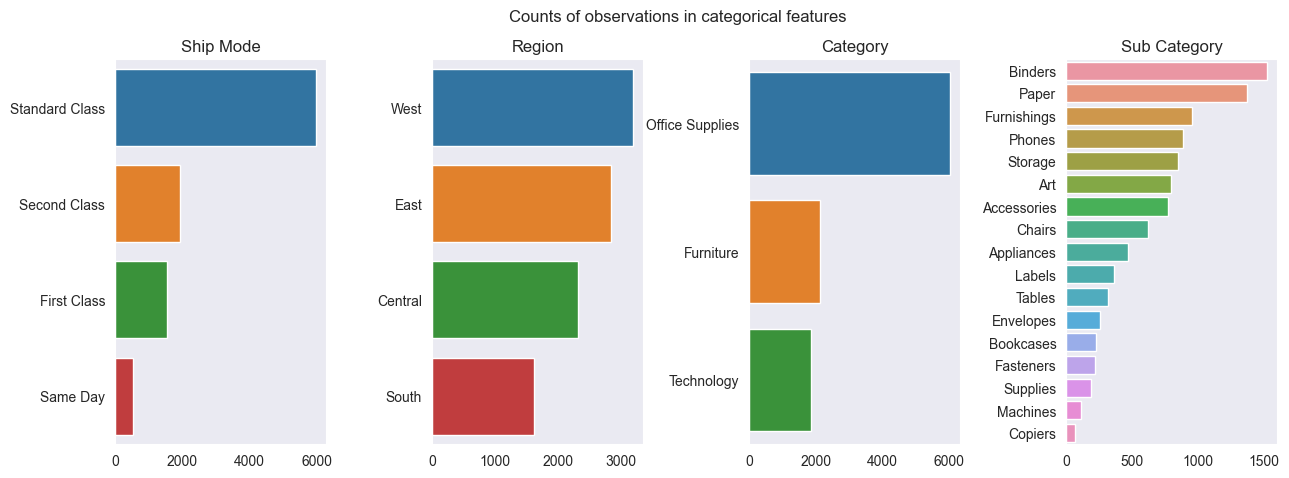

In [227]:
plot_cat_count(df_raw, 'Counts of observations in categorical features')

In [228]:
df_columns = df_raw.columns
df_raw.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [229]:
df_columns_categorical = ['Ship Mode', 'Region', 'Category', 'Sub-Category']

In [230]:
for col in df_columns_categorical:
    print(df_raw[col].unique())

['First Class' 'Standard Class' 'Second Class' 'Same Day']
['West' 'East' 'Central' 'South']
['Technology' 'Office Supplies' 'Furniture']
['Accessories' 'Supplies' 'Phones' 'Furnishings' 'Fasteners' 'Storage'
 'Paper' 'Chairs' 'Binders' 'Art' 'Appliances' 'Envelopes' 'Labels'
 'Bookcases' 'Machines' 'Copiers' 'Tables']


In [231]:
print('Counts of observations in categorical features')
print()
for col in df_columns_categorical:
    print(df_raw[col].value_counts())
    print('----------------------------')

Counts of observations in categorical features

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
----------------------------
West       3203
East       2848
Central    2322
South      1620
Name: Region, dtype: int64
----------------------------
Office Supplies    6026
Furniture          2121
Technology         1846
Name: Category, dtype: int64
----------------------------
Binders        1523
Paper          1370
Furnishings     957
Phones          888
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64
----------------------------


In [232]:
print('Count number of distinct values')
print()
for col in df_raw.columns:
    print(col, '-', df_raw[col].nunique())

Count number of distinct values

Order ID - 5008
Order Date - 1237
Ship Mode - 4
Region - 4
Product ID - 1862
Category - 3
Sub-Category - 17
Product Name - 1850
Sales - 6061
Quantity - 14
Discount - 12
Profit - 6291


## Exploring numerical features

In [233]:
def plot_num_dist(df, func, title):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
    fig.suptitle(title)

    g1 = func(data=df, x='Sales', ax=ax[0])
    g1.set(title='Sales', xlabel=None)
    g1.tick_params(axis='x')

    g2 = func(data=df, x='Quantity', ax=ax[1])
    g2.set(title="Quantity", xlabel=None, ylabel=None)
    g2.tick_params(axis='x')

    g3 = func(data=df, x='Discount', ax=ax[2])
    g3.set(title="Discount", xlabel=None, ylabel=None)
    g3.tick_params(axis='x')

    g4 = func(data=df, x='Profit', ax=ax[3])
    g4.set(title="Profit", xlabel=None, ylabel=None)
    g4.tick_params(axis='x')
    plt.show()

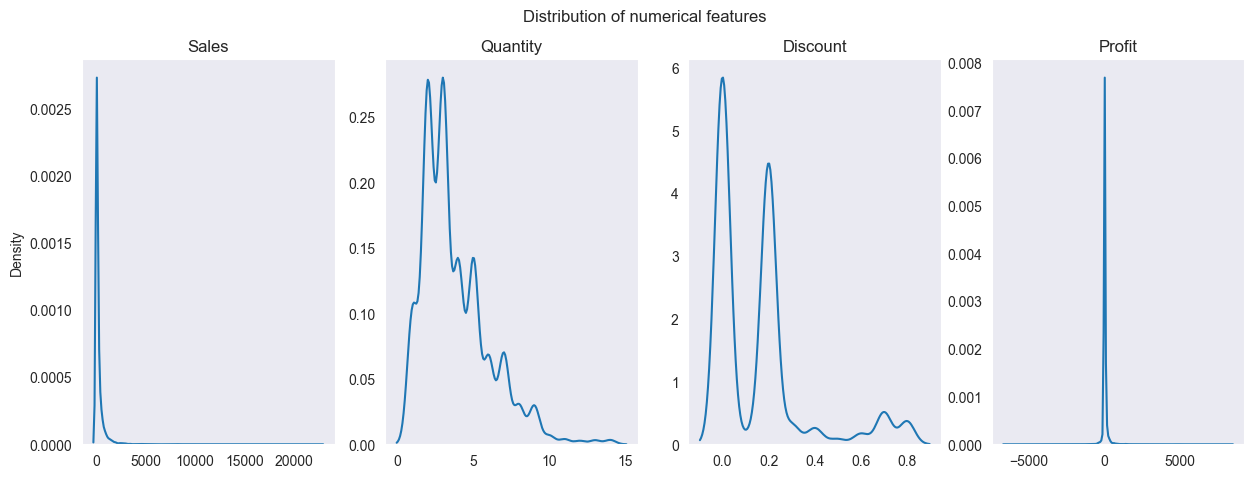

In [234]:
plot_num_dist(df_raw, sns.kdeplot, 'Distribution of numerical features')

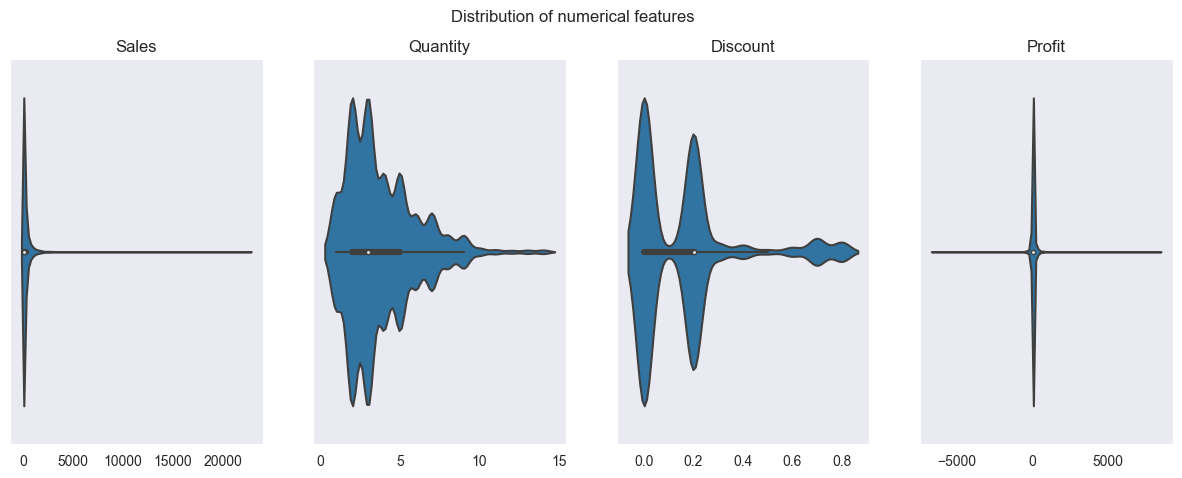

In [235]:
plot_num_dist(df_raw, sns.violinplot, 'Distribution of numerical features')

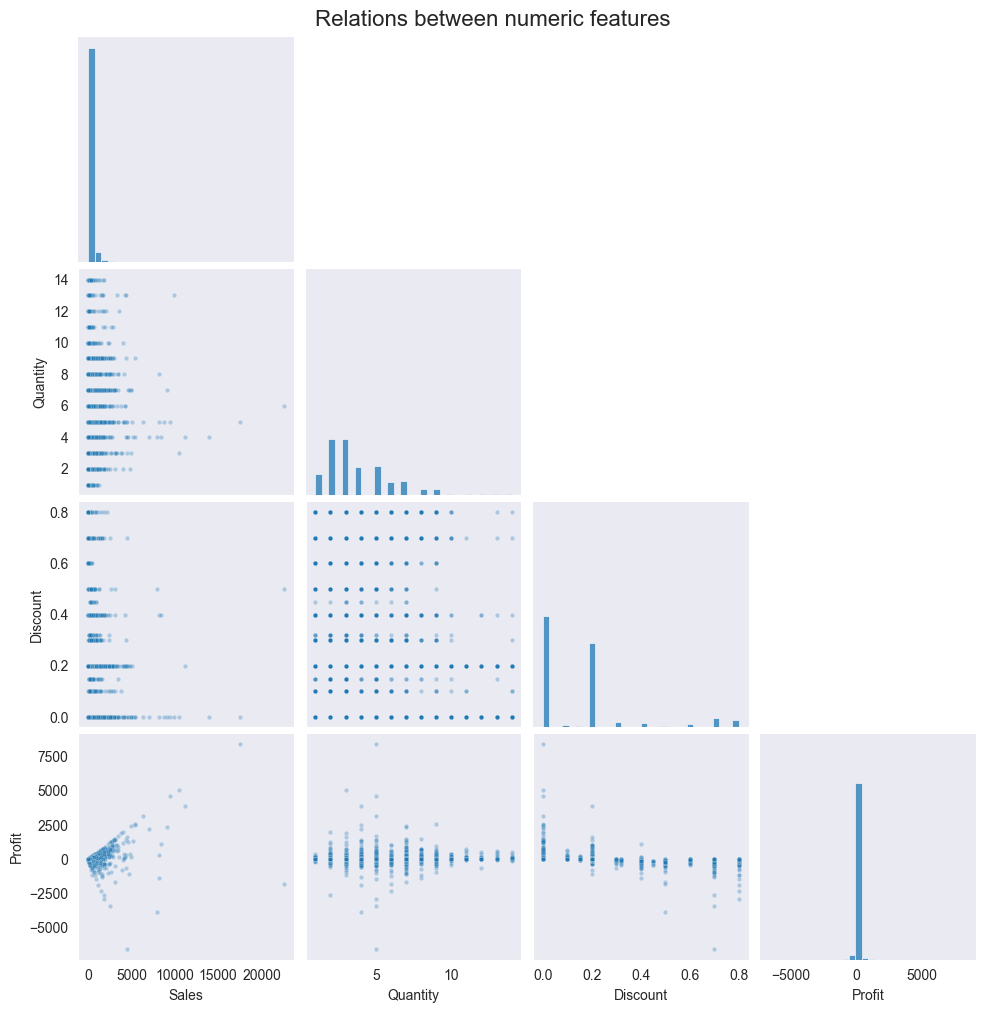

In [236]:
g = sns.pairplot(df_raw, corner = True, diag_kind = "hist", plot_kws=dict(alpha=0.3, s=10), diag_kws=dict(bins=30)) 
g.fig.suptitle('Relations between numeric features', y = 1.01, fontsize=16)
plt.show()

In [237]:
def plot_cat_num_count(df, title):    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    fig.suptitle(title)

    g1 = sns.countplot(data=df, y='Quantity', ax=ax[0], order=df['Quantity'].value_counts().index)
    g1.set(title='Quantity', xlabel=None, ylabel=None)
 
    g2 = sns.countplot(data=df, y='Discount', ax=ax[1], order=df['Discount'].value_counts().index)
    g2.set(title='Discount', xlabel=None, ylabel=None)

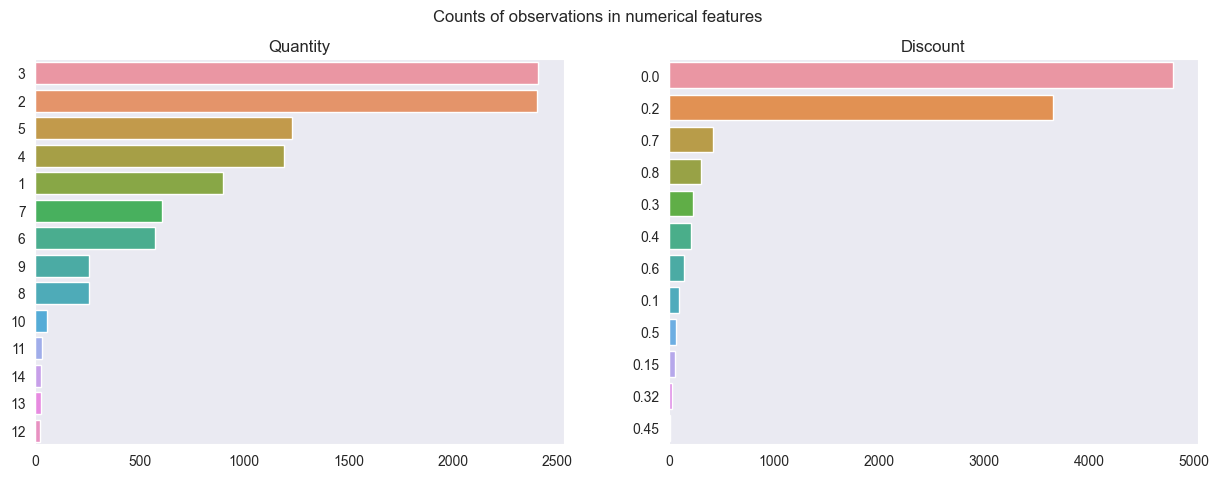

In [238]:
plot_cat_num_count(df_raw, 'Counts of observations in numerical features')

## Exploring missing data

In [239]:
df_raw.isna().sum()

Order ID           0
Order Date         0
Ship Mode          0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit          1993
dtype: int64

In [240]:
print('Missing data in column "Profit"-', round(df_raw['Profit'].isna().sum()/df_raw.shape[0]*100, 2), '%')

Missing data in column "Profit"- 19.94 %


## Exploring duplicates

In [241]:
df_raw.duplicated().sum()

1

In [242]:
df_raw[df_raw.duplicated()]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5399,US-2014-150119,2014-04-23,Standard Class,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


## Custom checks

In [243]:
df_raw['Product ID'].nunique()

1862

In [244]:
df_raw['Product Name'].nunique()

1850

## Summary checking data
- The dataset contains one row for each order.
- The dataset contains order from 2014-01-03 to 2017-12-30.
- There are 9993 rows and 12 columns in the dataset.
- There are four data types in the dataset: float64(3), int64(1), object(7), datetime(1). 
- There are ~20% missing data in the column "Profit".
- There is 1 duplicate row in the dataset.

#### Some changes have been made to the dataset
- Drop duplicates rows

In [245]:
df = df_raw.copy()

In [246]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [247]:
df.shape

(9992, 12)

In [248]:
df.to_csv('data/office_supplies_transform.csv')

### Data Discovery and Visualization

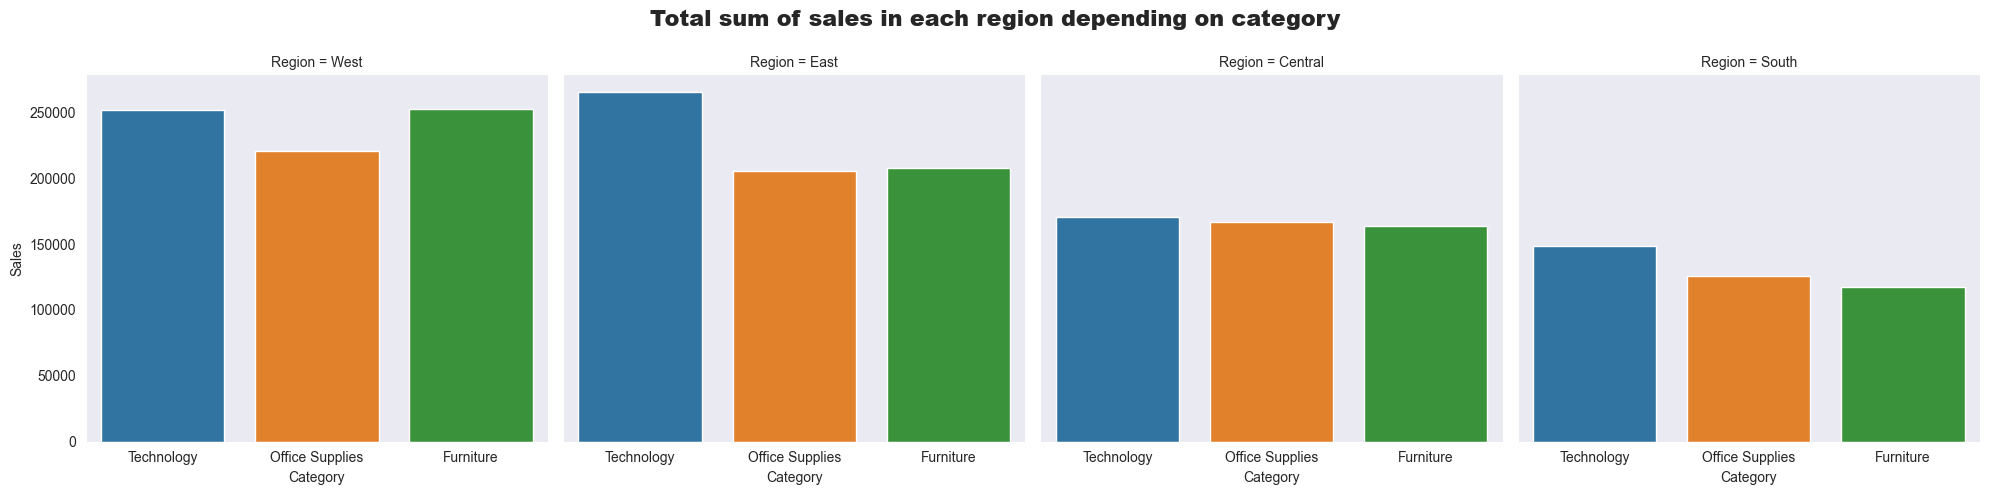

In [249]:
g = sns.catplot(data=df, y='Sales', x='Category', col='Region', kind='bar', errorbar=None, estimator=sum)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Total sum of sales in each region depending on category', size=16, weight='heavy')
# g0,g1,g2,g3  = g.fig.axes[0:4]
# g0.set_title("Title1")
# g1.set_title("Title2")
# g2.set_title("Title3")
# g3.set_title("Title4")
plt.show()
g.fig.savefig("image/pic1.png")

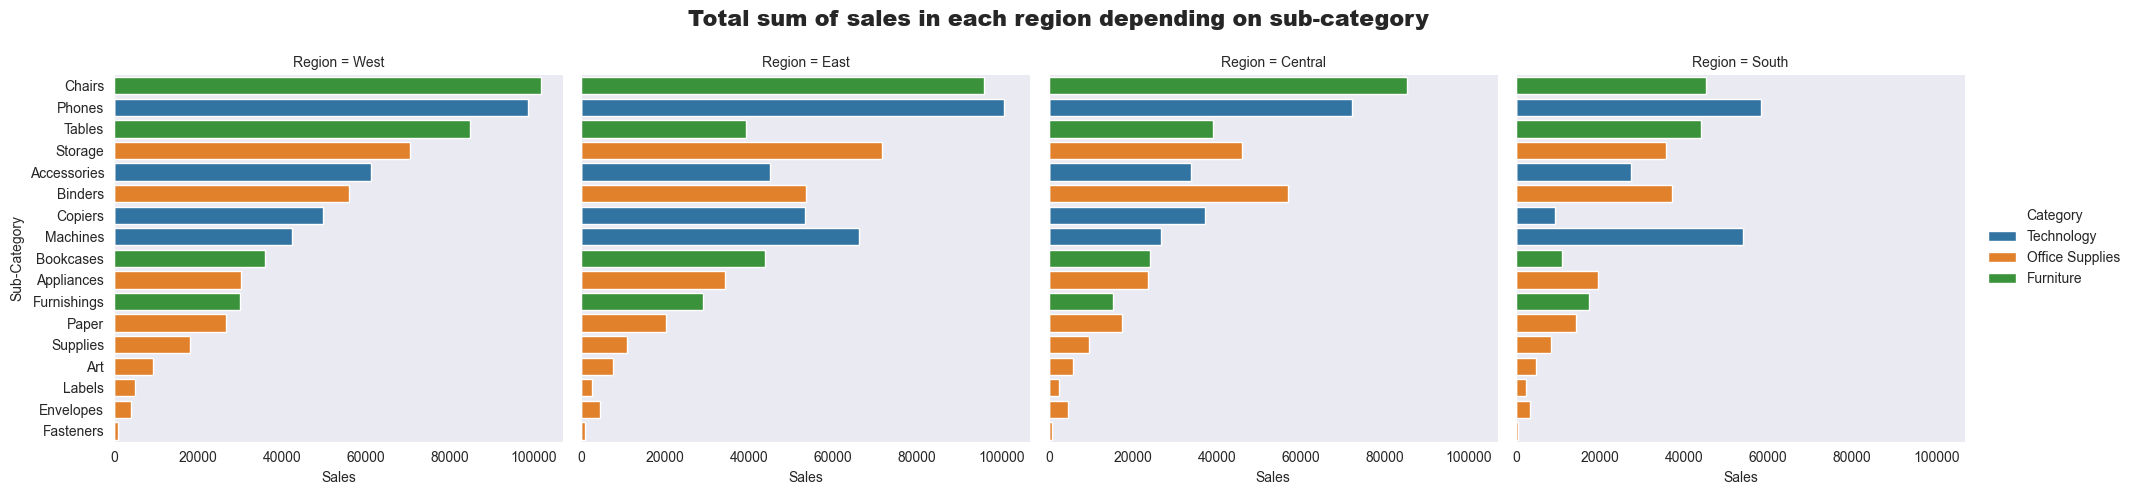

In [250]:
g = sns.catplot(data=df, x='Sales', y='Sub-Category', col='Region', kind='bar', errorbar=None, estimator=sum,\
     order=df[df['Region']=='West'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).index,\
     hue='Category', dodge=False)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Total sum of sales in each region depending on sub-category', size=16, weight='heavy')
plt.show()
g.fig.savefig("image/pic2.png")

In [251]:
# Best selling TOP 10 products
top10_best_selling_products = df.groupby(['Product ID', 'Product Name', 'Sub-Category'], as_index=False)\
    ['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)
top10_best_selling_products

,Product ID,Product Name,Sub-Category,Sales
1640,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Copiers,61599.824
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,Binders,27453.384
1669,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,Machines,22638.480
82,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Chairs,21870.576
701,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,Binders,19823.479
667,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Binders,19024.500
1630,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,Copiers,18839.686
1657,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,Machines,18374.895
858,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,Binders,17965.068
1443,OFF-SU-10000151,High Speed Automatic Electric Letter Opener,Supplies,17030.312


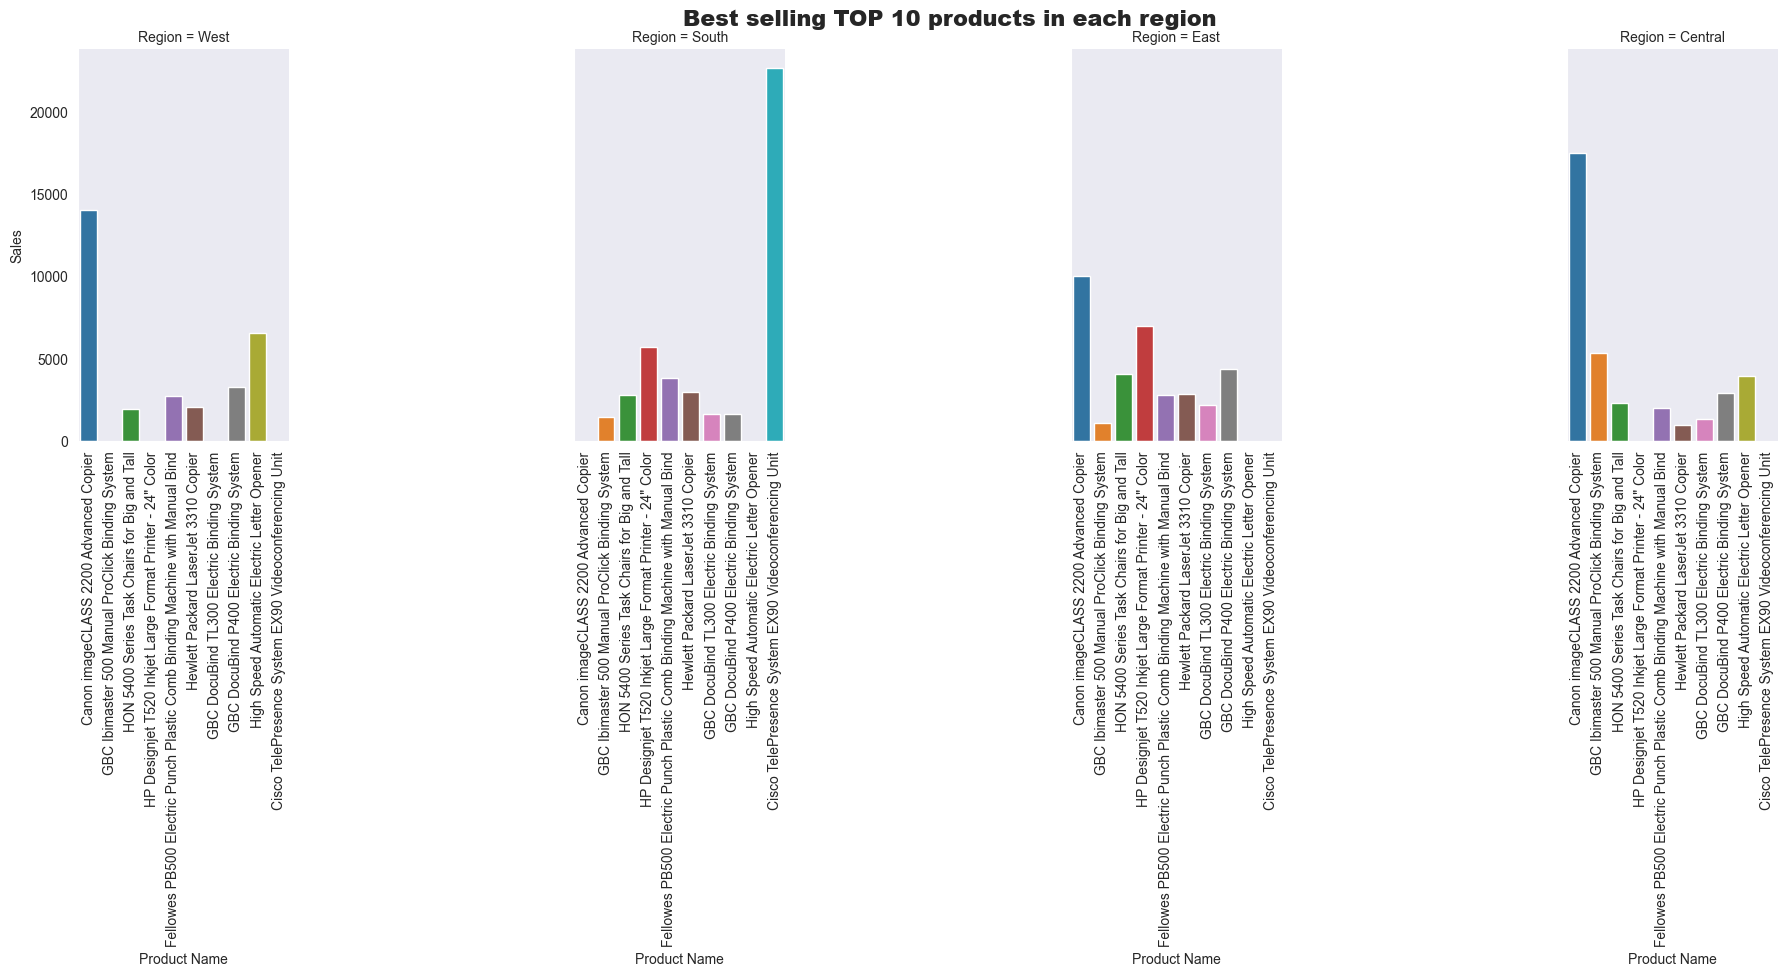

In [252]:
g = sns.catplot(data=df[df['Product ID'].isin(top10_best_selling_products['Product ID'])],\
     y='Sales', x='Product Name', col='Region', kind='bar', errorbar=None)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Best selling TOP 10 products in each region', size=16, weight='heavy')
g.set_xticklabels(rotation=90)
plt.show()

In [253]:
df[df['Product ID'].isin(top10_best_selling_products['Product ID'])].head(3)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
152,CA-2017-140151,2017-03-23,First Class,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,NaN
207,CA-2015-141565,2015-09-20,Standard Class,South,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,1369.764,6,0.7,NaN
235,CA-2017-102204,2017-05-01,Standard Class,South,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2803.920,5,0.2,NaN



# Analysis of products that are not sold in some places

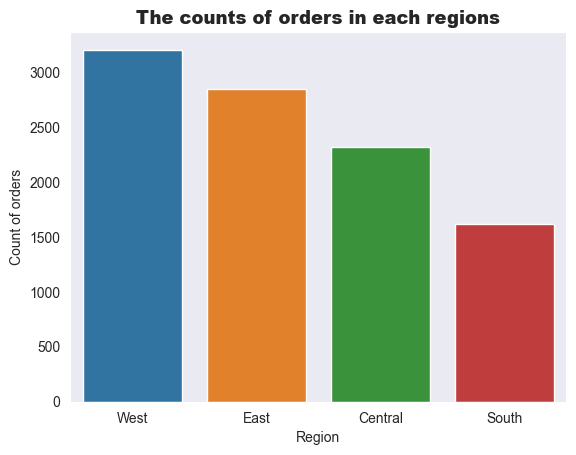

In [254]:
g = sns.countplot(data=df, x='Region')
g.set(ylabel='Count of orders')
plt.title('The counts of orders in each regions', size=13, weight='heavy')
plt.show()
fig = g.get_figure()
fig.savefig("image/pic3.png")

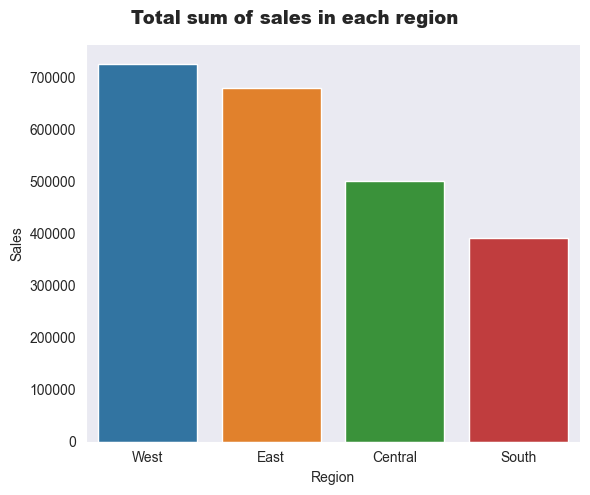

In [255]:
g = sns.catplot(data=df, y='Sales', x='Region', kind='bar', errorbar=None, estimator=sum, aspect=1.2)
g.fig.subplots_adjust(top=0.91)
g.fig.suptitle('Total sum of sales in each region', size=13, weight='heavy')
plt.show()
g.fig.savefig("image/pic10.png")

In [256]:
# Create df with 'Sales', 'Quantity', 'Profit' for each product in each region
df_group_region_prod_ID = df.groupby(['Region', 'Product ID'])[['Sales', 'Quantity', 'Profit']].agg('sum').reset_index()

In [257]:
df_group_region_prod_ID.head(3)

,Region,Product ID,Sales,Quantity,Profit
0,Central,FUR-BO-10000112,825.174,9,-117.8820
1,Central,FUR-BO-10000362,359.058,3,-35.9058
2,Central,FUR-BO-10000468,194.320,4,31.0912


In [258]:
# Create df with the number of product sale in each region
df_group_region_prod_ID_pivot_quantity = df_group_region_prod_ID.pivot(index='Product ID', columns='Region', values='Quantity')
df_group_region_prod_ID_pivot_quantity.reset_index(inplace=True)
df_group_region_prod_ID_pivot_quantity.rename_axis(None, axis=1, inplace=True)
df_group_region_prod_ID_pivot_quantity.head(3)

,Product ID,Central,East,South,West
0,FUR-BO-10000112,9.0,NaN,NaN,NaN
1,FUR-BO-10000330,NaN,NaN,2.0,8.0
2,FUR-BO-10000362,3.0,9.0,NaN,2.0


In [259]:

# df_group_region_prod_ID_pivot_sales = df_group_region_prod_ID.pivot(index='Product ID', columns='Region', values='Sales')
# df_group_region_prod_ID_pivot_sales.reset_index(inplace=True)
# df_group_region_prod_ID_pivot_sales.rename_axis(None, axis=1, inplace=True)
# df_group_region_prod_ID_pivot_sales.head(3)

In [260]:
# create list of products that are not sold in some region
list_products_not_sold_any_region = df_group_region_prod_ID_pivot_quantity\
    [~df_group_region_prod_ID_pivot_quantity[['Central', 'East', 'South', 'West']].fillna(0).all(axis=1)]
list_products_not_sold_any_region.head(3)

,Product ID,Central,East,South,West
0,FUR-BO-10000112,9.0,NaN,NaN,NaN
1,FUR-BO-10000330,NaN,NaN,2.0,8.0
2,FUR-BO-10000362,3.0,9.0,NaN,2.0


In [297]:
print('The number of products that are not sold in one of the regions =', len(list_products_not_sold_any_region))
print('Percentage of the total number of unique products that are not sold in one of the regions =',\
     len(list_products_not_sold_any_region)/df['Product ID'].nunique()*100,'%')

The number of products that are not sold in one of the regions = 1370
Percentage of the total number of unique products that are not sold in one of the regions = 73.57679914070891 %


In [262]:
# create list of products that are sold in one region
list_products_sold_only_one_region = list_products_not_sold_any_region.copy()
list_products_sold_only_one_region['Number_region_sold']  = list_products_sold_only_one_region[['Central', 'East', 'South', 'West']].apply('count', axis=1)
list_products_sold_only_one_region['Total_product_sold'] = list_products_sold_only_one_region[['Central', 'East', 'South', 'West']].apply('sum', axis=1)
list_products_sold_only_one_region = list_products_sold_only_one_region[list_products_sold_only_one_region['Number_region_sold']==1]
list_products_sold_only_one_region.fillna(value=0, inplace=True)
list_products_sold_only_one_region.head(3)

,Product ID,Central,East,South,West,Number_region_sold,Total_product_sold
0,FUR-BO-10000112,9.0,0.0,0.0,0.0,1,9.0
8,FUR-BO-10001567,0.0,0.0,0.0,3.0,1,3.0
17,FUR-BO-10002206,0.0,0.0,0.0,1.0,1,1.0


In [296]:
print('The number of products that are sold only in one of the region =', len(list_products_sold_only_one_region))
print('Percentage of the total number of unique products that are sold only in one of the region =',\
     len(list_products_sold_only_one_region)/df['Product ID'].nunique()*100,'%')

The number of products that are sold only in one of the region = 163
Percentage of the total number of unique products that are sold only in one of the region = 8.754027926960257 %


In [264]:
# Find the number of items sold only in one region
list_products_sold_only_one_region_invert = list_products_sold_only_one_region.copy()
list_products_sold_only_one_region_invert[['Central', 'East', 'South', 'West']] = list_products_sold_only_one_region[['Central', 'East', 'South', 'West']].applymap(bool)
list_products_sold_only_one_region_invert_count = list_products_sold_only_one_region_invert[['Central', 'East', 'South', 'West']].sum()

In [265]:
# Check total sum of number of items sold only in one region
list_products_sold_only_one_region['Product ID'].nunique() == list_products_sold_only_one_region_invert_count.sum()

True

In [266]:
# convert to DataFrame
list_products_sold_only_one_region_invert_count = list_products_sold_only_one_region_invert_count.to_frame()
list_products_sold_only_one_region_invert_count.reset_index(inplace=True)
list_products_sold_only_one_region_invert_count.columns = ['Region', 'Count']
list_products_sold_only_one_region_invert_count

,Region,Count
0,Central,28
1,East,53
2,South,23
3,West,59


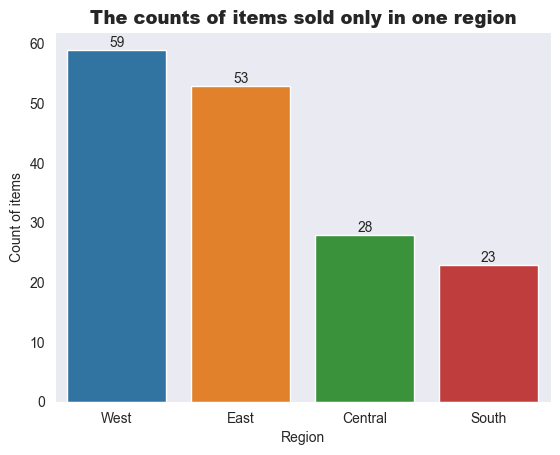

In [267]:
g = sns.barplot(data=list_products_sold_only_one_region_invert_count, x='Region', y='Count', order=['West', 'East', 'Central', 'South'])
g.bar_label(g.containers[0])
g.set(ylabel='Count of items')
plt.title('The counts of items sold only in one region', size=13, weight='heavy')
plt.show()
fig = g.get_figure()
fig.savefig("image/pic4.png")

In [268]:
print('List of products sold only in a single specimen:')
print()
for row in df[df['Product ID'].isin(list_products_sold_only_one_region[list_products_sold_only_one_region['Total_product_sold']==1]['Product ID'])][['Product Name']].values:
    print(*row)

List of products sold only in a single specimen:

Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs
Penpower WorldCard Pro Card Scanner
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order
Boston 1900 Electric Pencil Sharpener
Xerox 20


# Conclusion 1:
The graph shows the counts of items sold in only one of the four regions.  
For example, 49 products with a unique ID were sold in the western region. These products were not sold in other regions.  
A total, 163 units of such products were sold in four regions.   
This means that 8.7% of the total number of items are sold in only one region.   
5 items of products that were sold only in a single copy:
- Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs
- Penpower WorldCard Pro Card Scanner
- Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order
- Boston 1900 Electric Pencil Sharpener
- Xerox 20
The answer to the first question is yes. There are products that don't sell well in some regions.




# Analysis patterns over time in each region 

In [269]:

# Create DataFrame with count of order and sales over time
df_Count = df[['Order Date', 'Region', 'Sales']].copy()
df_Count['Count_order'] = 1
df_Count = df_Count.set_index('Order Date')
df_Count.head(3)

,Region,Sales,Count_order
Order Date,,,
2015-12-12,West,299.94,1
2015-12-12,West,25.76,1
2014-12-01,East,271.90,1


In [270]:
# Aggregate data by month 
df_resample_count = df_Count.resample('MS').sum()
df_resample_count['year_month'] = df_resample_count.index.strftime('%Y-%b')
df_resample_count['month'] = df_resample_count.index.strftime('%b')
df_resample_count['month_number'] = df_resample_count.index.strftime('%m').astype('int')
df_resample_count.head(3)

,Sales,Count_order,year_month,month,month_number
Order Date,,,,,
2014-01-01,14236.895,79,2014-Jan,Jan,1
2014-02-01,4519.892,46,2014-Feb,Feb,2
2014-03-01,55691.009,157,2014-Mar,Mar,3


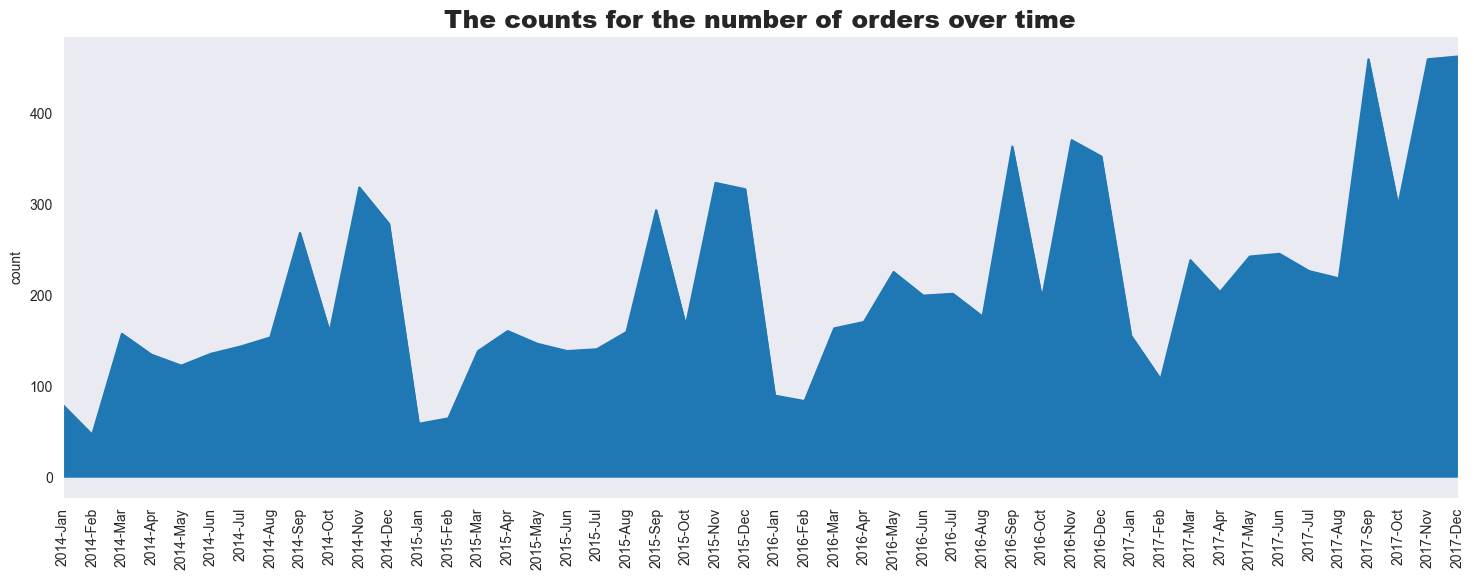

In [271]:
g = df_resample_count.plot(kind='area', y='Count_order', legend=False, xlabel='', ylabel='count', figsize=(18, 6))
g.set_xticks(ticks=df_resample_count.index, labels=df_resample_count.year_month, rotation=90)
plt.title('The counts for the number of orders over time', size=18, weight='heavy')
plt.show()
fig = g.get_figure()
fig.savefig("image/pic7.png")

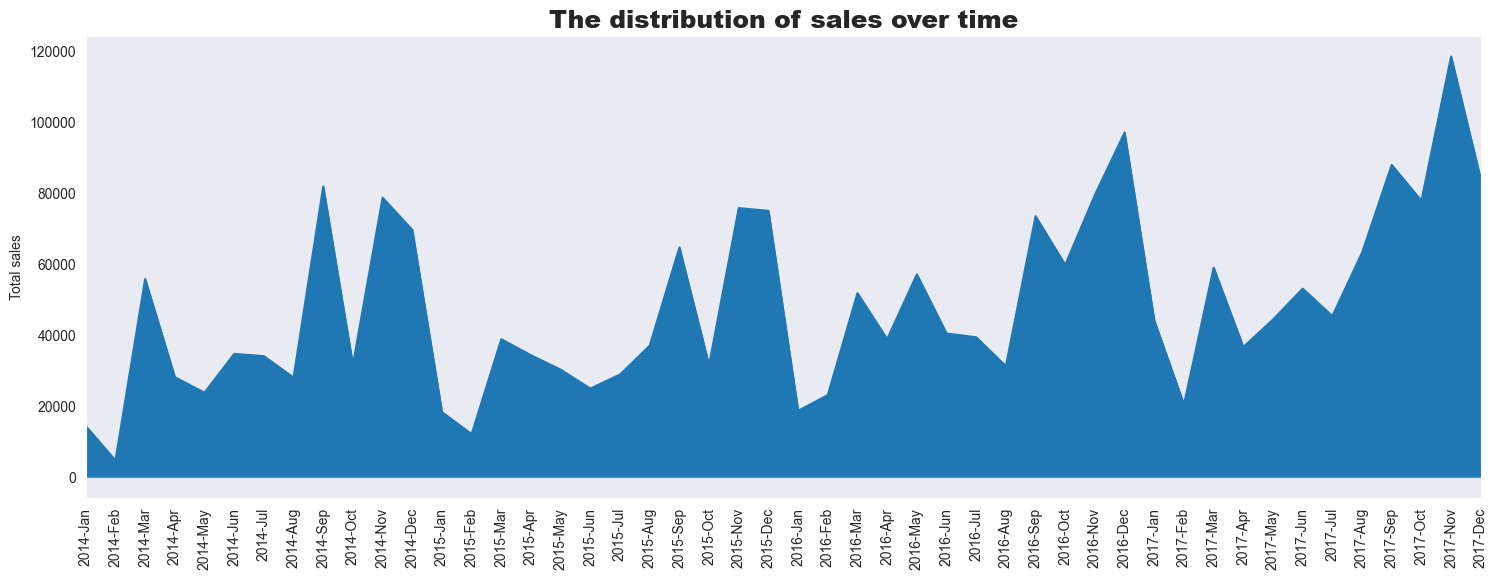

In [272]:
g = df_resample_count.plot(kind='area', y='Sales', legend=False, xlabel='', ylabel='Total sales', figsize=(18, 6))
g.set_xticks(ticks=df_resample_count.index, labels=df_resample_count.year_month, rotation=90)
plt.title('The distribution of sales over time', size=18, weight='heavy')
plt.show()

In [273]:
# Create DataFrame with counts for the number of orders in each month
df_resample_count_group_month = df_resample_count.groupby(['month', 'month_number'],as_index=False )['Count_order'].sum()
df_resample_count_group_month = df_resample_count_group_month.sort_values('month_number')
df_resample_count_group_month.head(3)

,month,month_number,Count_order
4,Jan,1,381
3,Feb,2,300
7,Mar,3,696


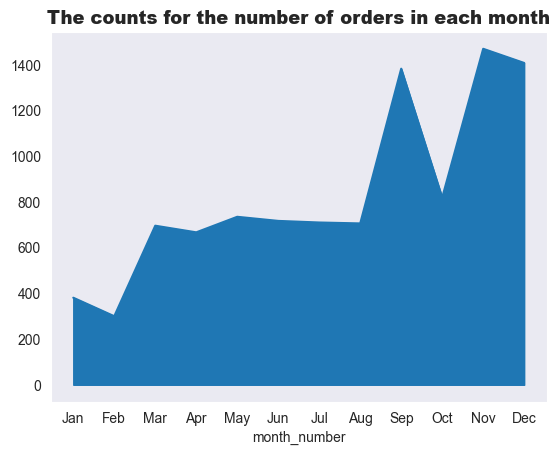

In [274]:
g = df_resample_count_group_month.plot(kind='area', x='month_number', y='Count_order', legend=False)
g.set_xticks(ticks=df_resample_count_group_month.month_number, labels=df_resample_count_group_month.month)
plt.title('The counts for the number of orders in each month', size=13, weight='heavy')
plt.show()

In [275]:
# Create DataFrame with the number of orders in each region over time
df_Count_region = df[['Order Date', 'Region']].copy()
df_Count_region['Count_order'] = 1
df_Count_region.head(3)

,Order Date,Region,Count_order
0,2015-12-12,West,1
1,2015-12-12,West,1
2,2014-12-01,East,1


In [276]:
df_Count_region_pivot = df_Count_region.pivot_table(index='Order Date', columns='Region', values='Count_order', aggfunc='sum').fillna(0)
df_Count_region_pivot = df_Count_region_pivot.reset_index().rename_axis(None, axis=1)
df_Count_region_pivot = df_Count_region_pivot.set_index('Order Date')
df_Count_region_pivot.head(3)

,Central,East,South,West
Order Date,,,,
2014-01-03,1.0,0.0,0.0,0.0
2014-01-04,3.0,0.0,0.0,0.0
2014-01-05,0.0,1.0,0.0,0.0


In [277]:
# Aggregate data by month 
df_Count_region_pivot_resample = df_Count_region_pivot.resample('MS').sum()
df_Count_region_pivot_resample['year_month'] = df_Count_region_pivot_resample.index.strftime('%Y-%b')
df_Count_region_pivot_resample['month'] = df_Count_region_pivot_resample.index.strftime('%b')
df_Count_region_pivot_resample['month_number'] = df_Count_region_pivot_resample.index.strftime('%m').astype('int')
df_Count_region_pivot_resample.head(3)

,Central,East,South,West,year_month,month,month_number
Order Date,,,,,,,
2014-01-01,21.0,10.0,32.0,16.0,2014-Jan,Jan,1
2014-02-01,19.0,3.0,8.0,16.0,2014-Feb,Feb,2
2014-03-01,30.0,33.0,50.0,44.0,2014-Mar,Mar,3


In [278]:
df_Count_region_pivot_resample_group_month = df_Count_region_pivot_resample.groupby(['month', 'month_number'],as_index=False ).sum()
df_Count_region_pivot_resample_group_month = df_Count_region_pivot_resample_group_month.sort_values('month_number')
df_Count_region_pivot_resample_group_month.head(3)

,month,month_number,Central,East,South,West
4,Jan,1,109.0,90.0,77.0,105.0
3,Feb,2,70.0,82.0,52.0,96.0
7,Mar,3,177.0,190.0,124.0,205.0


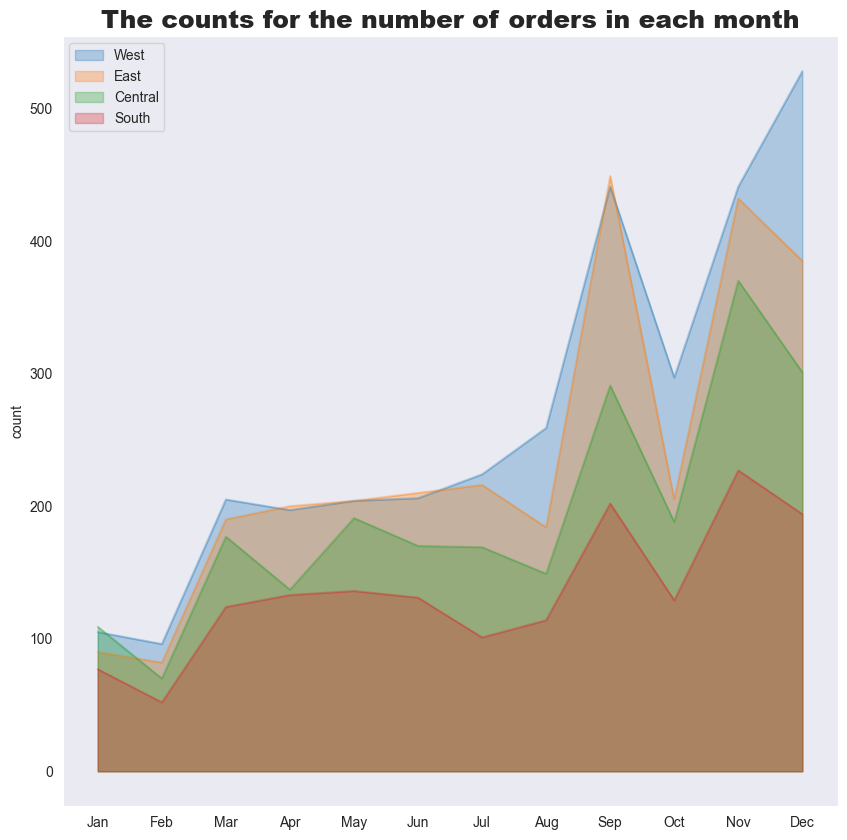

In [279]:
g = df_Count_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='West', xlabel='', ylabel='count', figsize=(10, 10), alpha=0.3)
df_Count_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='East', xlabel='', ylabel='count', ax=g, alpha=0.3)
df_Count_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='Central', xlabel='', ylabel='count', ax=g, alpha=0.3)
df_Count_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='South', xlabel='', ylabel='count', ax=g, alpha=0.3)
g.set_xticks(ticks=df_Count_region_pivot_resample_group_month.month_number, labels=df_Count_region_pivot_resample_group_month.month)
plt.title('The counts for the number of orders in each month', size=18, weight='heavy')
plt.show()
fig = g.get_figure()
fig.savefig("image/pic8.png")

In [280]:
# Create DataFrame with the sales in each region over time
df_sales_region = df[['Order Date', 'Region', 'Sales']]
df_sales_region_pivot = df_sales_region.pivot_table(index='Order Date', columns='Region', values='Sales', aggfunc='sum').fillna(0)
df_sales_region_pivot = df_sales_region_pivot.reset_index().rename_axis(None, axis=1)
df_sales_region_pivot = df_sales_region_pivot.set_index('Order Date')
df_sales_region_pivot.head(3)

,Central,East,South,West
Order Date,,,,
2014-01-03,16.448,0.000,0.0,0.0
2014-01-04,288.060,0.000,0.0,0.0
2014-01-05,0.000,19.536,0.0,0.0


In [281]:
df_sales_region_pivot_resample = df_sales_region_pivot.resample('MS').sum()
df_sales_region_pivot_resample['year_month'] = df_sales_region_pivot_resample.index.strftime('%Y-%b')
df_sales_region_pivot_resample['month'] = df_sales_region_pivot_resample.index.strftime('%b')
df_sales_region_pivot_resample['month_number'] = df_sales_region_pivot_resample.index.strftime('%m').astype('int')
df_sales_region_pivot_resample.head(3)

,Central,East,South,West,year_month,month,month_number
Order Date,,,,,,,
2014-01-01,1539.906,436.174,9322.092,2938.723,2014-Jan,Jan,1
2014-02-01,1233.174,199.776,2028.986,1057.956,2014-Feb,Feb,2
2014-03-01,5827.602,5943.388,32911.121,11008.898,2014-Mar,Mar,3


In [282]:
df_sales_region_pivot_resample_group_month = df_sales_region_pivot_resample.groupby(['month', 'month_number'],as_index=False ).sum()
df_sales_region_pivot_resample_group_month = df_sales_region_pivot_resample_group_month.sort_values('month_number')
df_sales_region_pivot_resample_group_month.head(3)

,month,month_number,Central,East,South,West
4,Jan,1,31683.2296,15350.539,23185.942,24705.125
3,Feb,2,8211.3104,14781.252,20981.476,15777.213
7,Mar,3,41216.2618,36419.942,54115.110,73254.175


In [283]:
# check the sum of sales
round(df_sales_region_pivot_resample_group_month[['Central', 'East', 'South', 'West']].sum().sum()) == round(df.Sales.sum().sum())

True

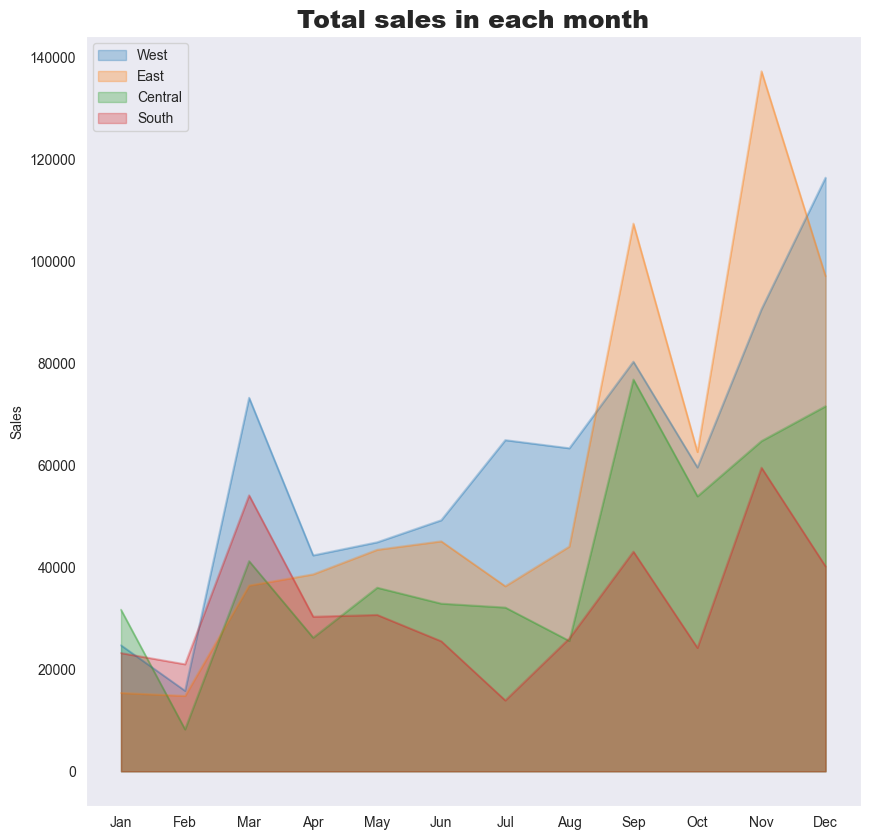

In [284]:
g = df_sales_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='West', xlabel='', ylabel='Sales', figsize=(10, 10), alpha=0.3)
df_sales_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='East', xlabel='', ylabel='Sales', ax=g, alpha=0.3)
df_sales_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='Central', xlabel='', ylabel='Sales', ax=g, alpha=0.3)
df_sales_region_pivot_resample_group_month.plot(kind='area', x='month_number', y='South', xlabel='', ylabel='Sales', ax=g, alpha=0.3)
g.set_xticks(ticks=df_Count_region_pivot_resample_group_month.month_number, labels=df_Count_region_pivot_resample_group_month.month)
plt.title('Total sales in each month', size=18, weight='heavy')
fig = g.get_figure()
fig.savefig("image/pic9.png")
plt.show()

In [285]:
# Add year and month rows in DataFrame
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df.head(3)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN,2015,12
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN,2015,12
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN,2014,12


In [286]:
# Agregate data by 'Region', 'Category', 'year'
df_Sales_Quantity_Region_Category_year = df.groupby(['Region', 'Category', 'year'], as_index=False)[['Sales', 'Quantity']].agg('sum')
df_Sales_Quantity_Region_Category_year.head(3)

,Region,Category,year,Sales,Quantity
0,Central,Furniture,2014,32909.6636,359
1,Central,Furniture,2015,35592.0470,411
2,Central,Furniture,2016,50773.1820,556


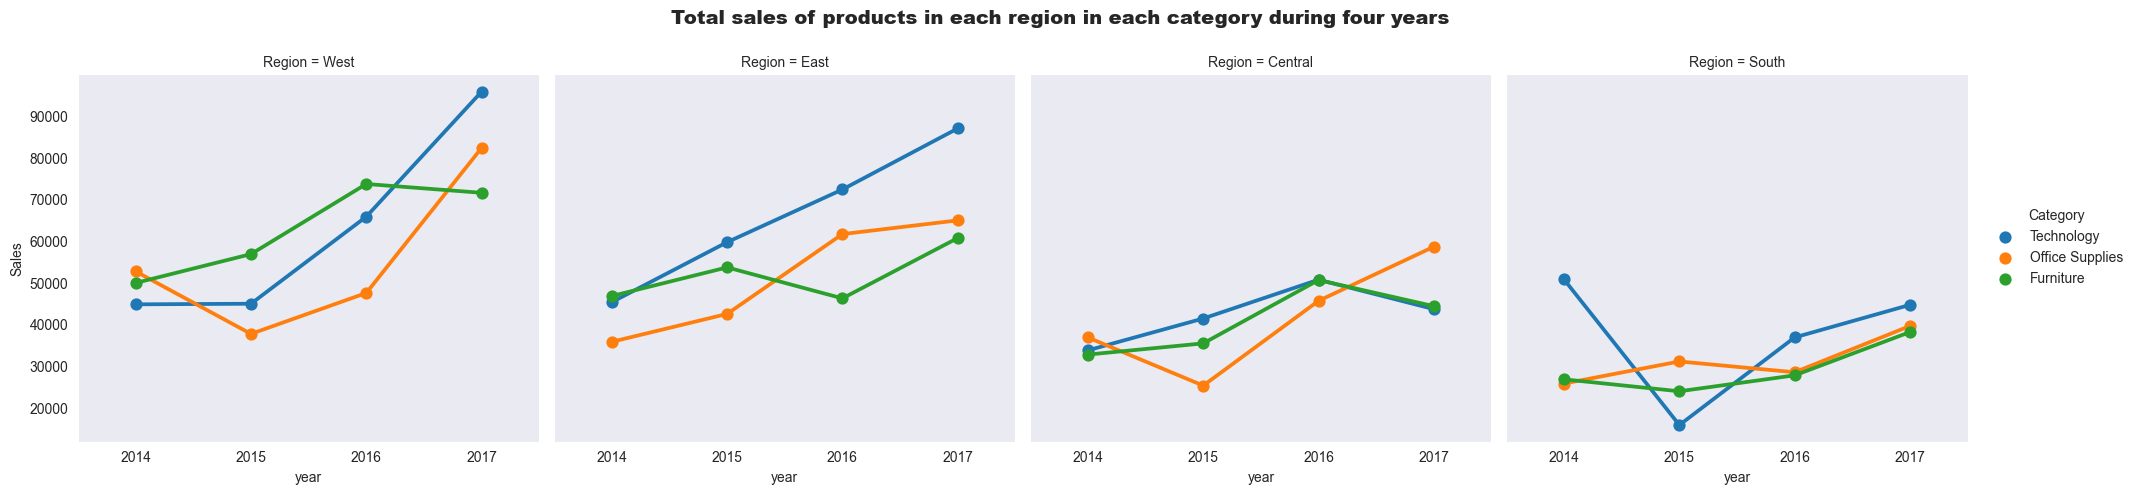

In [287]:
g = sns.catplot(data=df_Sales_Quantity_Region_Category_year, x='year', y='Sales', hue='Category', hue_order=['Technology', 'Office Supplies', 'Furniture'], col='Region', kind='point', col_order=['West', 'East', 'Central', 'South'])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Total sales of products in each region in each category during four years', size=14, weight='heavy')
plt.show()
g.fig.savefig("image/pic5.png")

In [288]:
# Agregate data by 'Region', 'Category', 'month'
df_Sales_Quantity_Region_Category_month = df.groupby(['month', 'Category', 'Region'], as_index=False)['Sales'].agg('sum')
df_Sales_Quantity_Region_Category_month.head(3)

,month,Category,Region,Sales
0,1,Furniture,Central,8506.4966
1,1,Furniture,East,4173.3940
2,1,Furniture,South,10131.6320


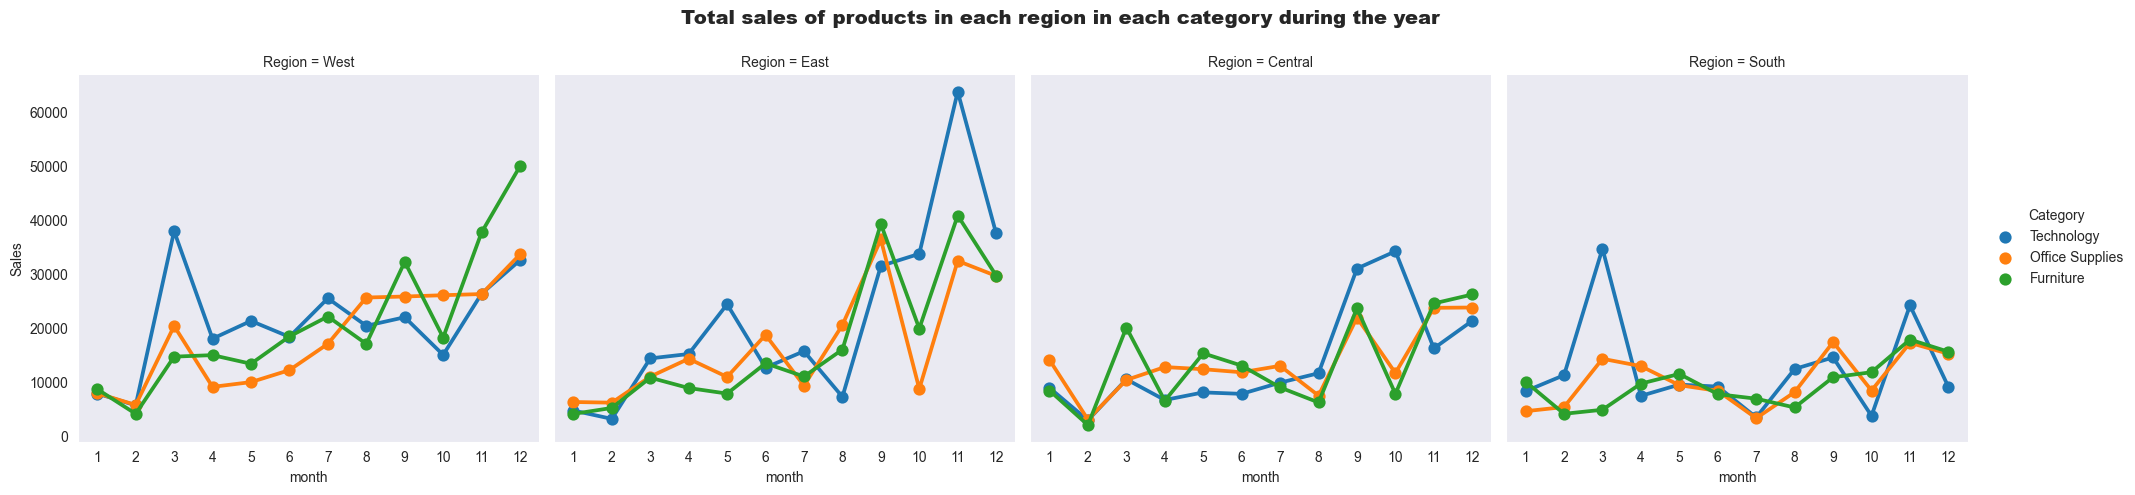

In [289]:
g = sns.catplot(data=df_Sales_Quantity_Region_Category_month, x='month', y='Sales', hue='Category',\
     hue_order=['Technology', 'Office Supplies', 'Furniture'], col='Region', kind='point', col_order=['West', 'East', 'Central', 'South'])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Total sales of products in each region in each category during the year', size=14, weight='heavy')
plt.show()
g.fig.savefig("image/pic6.png")

In [290]:
# Aggregate DataFrame by 'Year Month', 'Category', 'Region'
df_sort_date = df.sort_values('Order Date')
df_sort_date['Year_Month'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
df_Sales_Quantity_Region_Category_year_month = df_sort_date.groupby(['Year_Month', 'Category', 'Region'], as_index=False)['Sales'].agg('sum')
df_Sales_Quantity_Region_Category_year_month.head(3)

,Year_Month,Category,Region,Sales
0,2014-01,Furniture,Central,506.358
1,2014-01,Furniture,East,199.004
2,2014-01,Furniture,South,4378.728


In [291]:
# Create aggregate DataFrame by 'Year Month', 'Category', 'Region' for each region
df_sort_date_Central = df_sort_date[df_sort_date['Region']=='Central']
df_sort_date_East = df_sort_date[df_sort_date['Region']=='East']
df_sort_date_South = df_sort_date[df_sort_date['Region']=='South']
df_sort_date_West = df_sort_date[df_sort_date['Region']=='West']

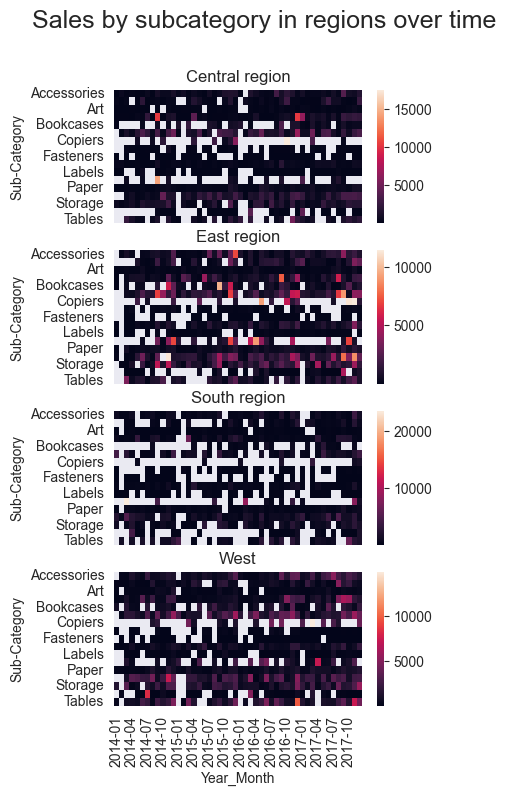

In [292]:
fig, ax = plt.subplots(figsize=(4,8), nrows=4, ncols=1, sharex=True, sharey=True)
sns.heatmap(pd.crosstab(index=df_sort_date_Central['Sub-Category'], columns=df_sort_date_Central['Year_Month'],\
     values=df_sort_date_Central['Sales'], aggfunc='sum'), ax=ax[0])
sns.heatmap(pd.crosstab(index=df_sort_date_East['Sub-Category'], columns=df_sort_date_East['Year_Month'],\
     values=df_sort_date_East['Sales'], aggfunc='sum'), ax=ax[1])
sns.heatmap(pd.crosstab(index=df_sort_date_South['Sub-Category'], columns=df_sort_date_South['Year_Month'],\
     values=df_sort_date_South['Sales'], aggfunc='sum'), ax=ax[2])
sns.heatmap(pd.crosstab(index=df_sort_date_West['Sub-Category'], columns=df_sort_date_West['Year_Month'],\
     values=df_sort_date_West['Sales'], aggfunc='sum'), ax=ax[3])
ax[0].set(xlabel=None, title='Central region')
ax[1].set(xlabel=None, title='East region')
ax[2].set(xlabel=None, title='South region')
ax[3].set(title='West')
fig.suptitle('Sales by subcategory in regions over time', fontsize=18)
plt.show()

In [293]:
# Create rolling window calculations, size of the moving window 7, 28, 365 days
df_sort_date_temp = df_sort_date.copy()
df_sort_date_temp['7_day_sale'] = df_sort_date_temp.Sales.rolling(window=7,center=False).mean()
df_sort_date_temp['28_day_sale'] = df_sort_date_temp.Sales.rolling(window=28,center=False).mean()
df_sort_date_temp['365_day_sale'] = df_sort_date_temp.Sales.rolling(window=365,center=False).mean()

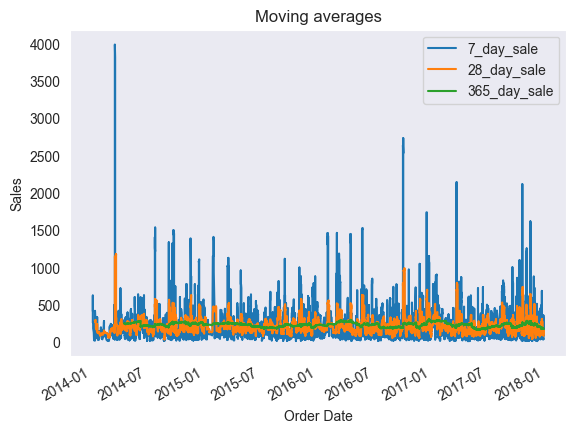

In [294]:
df_sort_date_temp.plot(x='Order Date', y=['7_day_sale', '28_day_sale', '365_day_sale'],\
     title = 'Moving averages', ylabel = 'Sales')
plt.show()

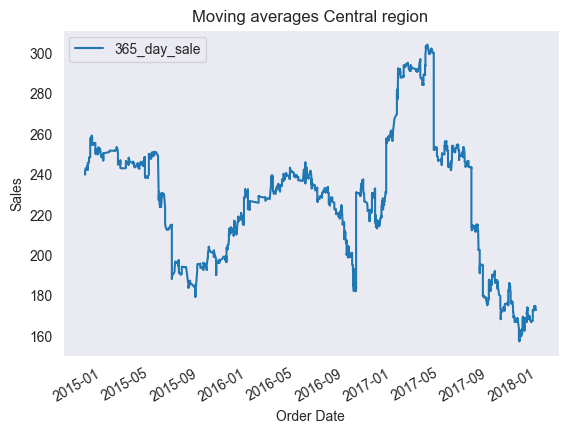

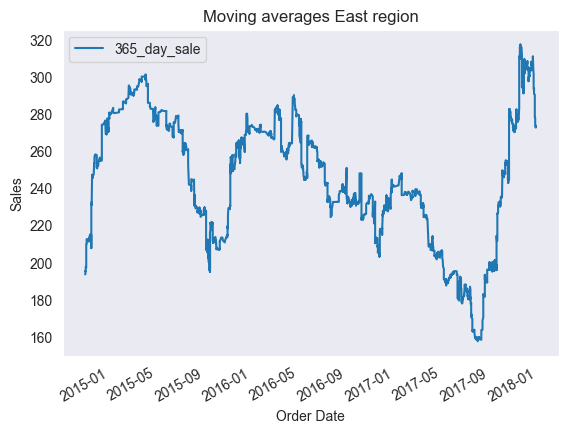

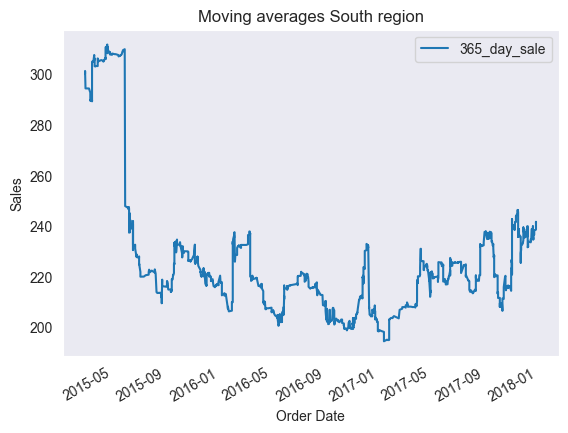

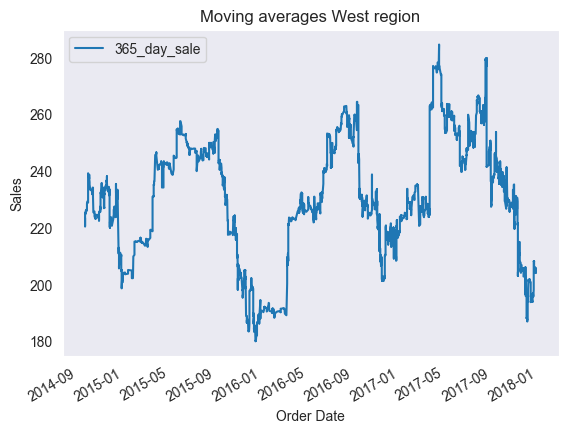

In [295]:
df_sort_date_Central_temp = df_sort_date_Central.copy()
df_sort_date_East_temp = df_sort_date_East.copy()
df_sort_date_South_temp = df_sort_date_South.copy()
df_sort_date_West_temp = df_sort_date_West.copy()

df_sort_date_Central_temp['365_day_sale'] = df_sort_date_Central.Sales.rolling(window=365,center=False).mean()
df_sort_date_East_temp['365_day_sale'] = df_sort_date_East.Sales.rolling(window=365,center=False).mean()
df_sort_date_South_temp['365_day_sale'] = df_sort_date_South.Sales.rolling(window=365,center=False).mean()
df_sort_date_West_temp['365_day_sale'] = df_sort_date_West.Sales.rolling(window=365,center=False).mean()

df_sort_date_Central_temp.plot(x='Order Date', y='365_day_sale', title = 'Moving averages Central region', ylabel = 'Sales')
df_sort_date_East_temp.plot(x='Order Date', y='365_day_sale', title = 'Moving averages East region', ylabel = 'Sales')
df_sort_date_South_temp.plot(x='Order Date', y='365_day_sale', title = 'Moving averages South region', ylabel = 'Sales')
df_sort_date_West_temp.plot(x='Order Date', y='365_day_sale', title = 'Moving averages West region', ylabel = 'Sales')
plt.show()

# Conclusion 2:
There is seasonal general trend in the number of orders.  
There is decrease in the number of orders in January and increase in September and November.  
The seasonal general trend of total sales is repeated for all regions.  
There is decrease in the total sales in February and increase in September, November and March.  
There are patterns over time in each region.  

## RECOMMENDATIONS TO THE BUSINESS FOR FUTURE WORK
Stimulate sales in the subcategory Chairs in the South region.   
Reduce the stock of items that are not sold in some regions.  
Sales strategy and storage volumes may be adjusted to seasonal demand.  